In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from numpy import array
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD

2.9.2


In [ ]:
url = 'systole.csv'
df = pd.read_csv(url)
df = df.drop_duplicates()
df

,irled,redled,heartrate,oxygen,systole
0,220710,188788,103,93,110
1,220757,188853,102,93,110
2,220760,188740,102,94,110
3,220785,188762,101,94,110
4,220700,188957,101,95,110
...,...,...,...,...,...
695,234290,193137,73,97,130
696,233823,192889,72,97,130
697,234629,193173,72,97,130
698,234321,193016,71,96,130


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
#df = df.drop(columns=['Open Time', 'Ignore', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   irled      692 non-null    int64
 1   redled     692 non-null    int64
 2   heartrate  692 non-null    int64
 3   oxygen     692 non-null    int64
 4   systole    692 non-null    int64
dtypes: int64(5)
memory usage: 27.2 KB


In [ ]:
df.describe()

,irled,redled,heartrate,oxygen,systole
count,692.000000,692.000000,692.000000,692.000000,692.000000
mean,219626.893064,183233.593931,91.177746,95.764451,122.251445
std,15904.209549,16174.440395,14.711757,1.680141,9.567360
min,170563.000000,146209.000000,62.000000,90.000000,105.000000
25%,211666.250000,167025.000000,81.000000,95.000000,117.000000
50%,221455.000000,190295.000000,92.000000,96.000000,120.000000
75%,228589.000000,196364.750000,99.000000,97.000000,130.000000
max,241813.000000,202086.000000,130.000000,99.000000,143.000000


In [ ]:
df.isnull().sum()

irled        0
redled       0
heartrate    0
oxygen       0
systole      0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(692, 5)

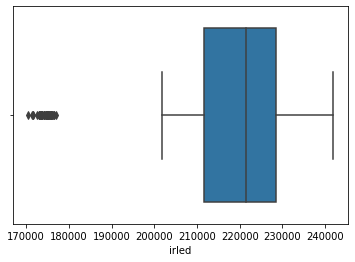

In [ ]:
sns.boxplot(x=df['irled'])

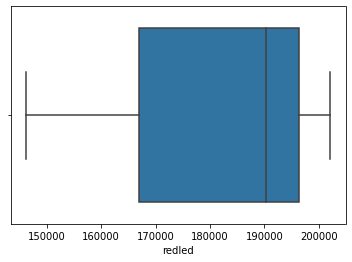

In [ ]:
sns.boxplot(x=df['redled'])

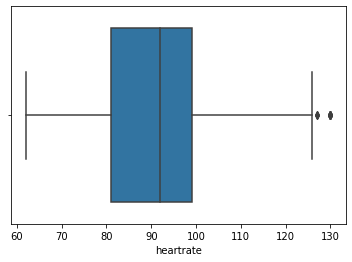

In [ ]:
sns.boxplot(x=df['heartrate'])

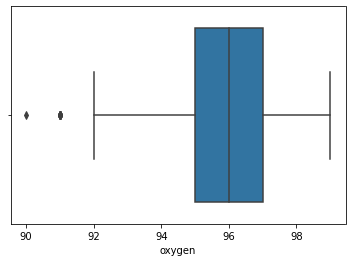

In [ ]:
sns.boxplot(x=df['oxygen'])

In [ ]:
num_var = ['irled','redled','heartrate','oxygen']
for i in num_var:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i] = np.where(df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df[i])
    df[i] = np.where(df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df[i])

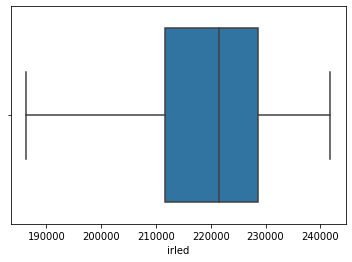

In [ ]:
sns.boxplot(x=df['irled'])

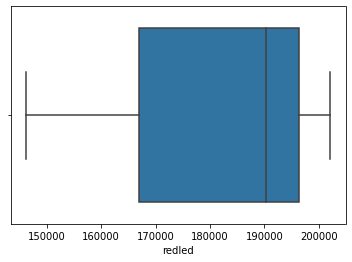

In [ ]:
sns.boxplot(x=df['redled'])

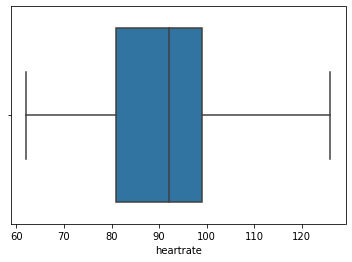

In [ ]:
sns.boxplot(x=df['heartrate'])

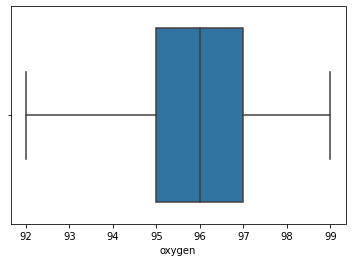

In [ ]:
sns.boxplot(x=df['oxygen'])

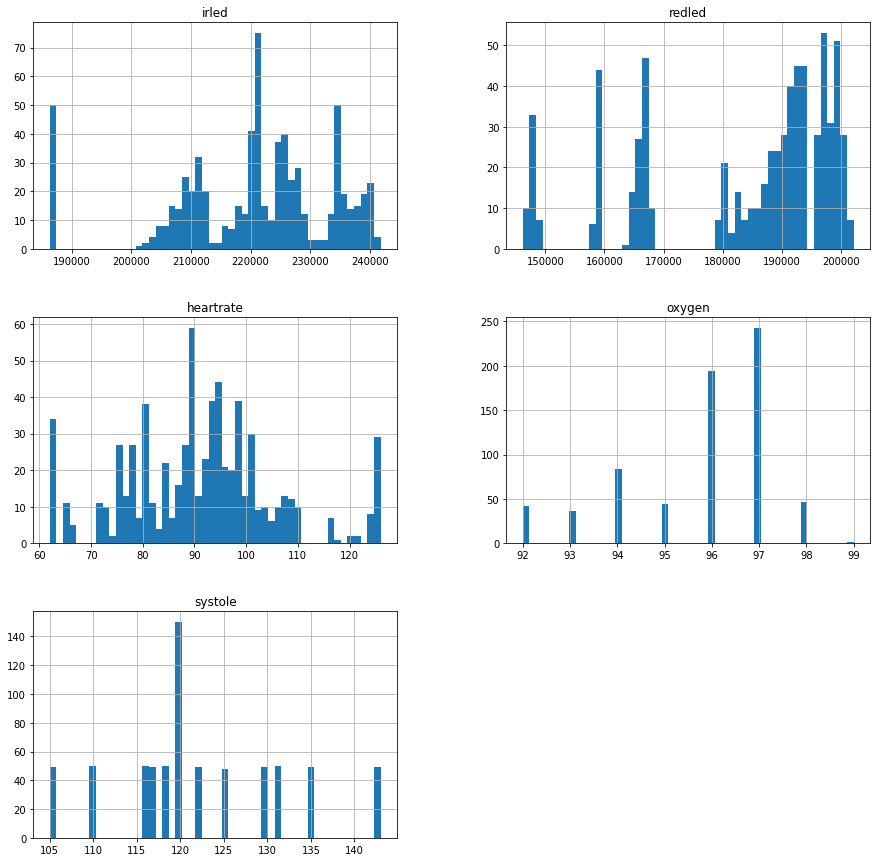

In [ ]:
df.hist(bins=50, figsize=(15,15))
plt.show()

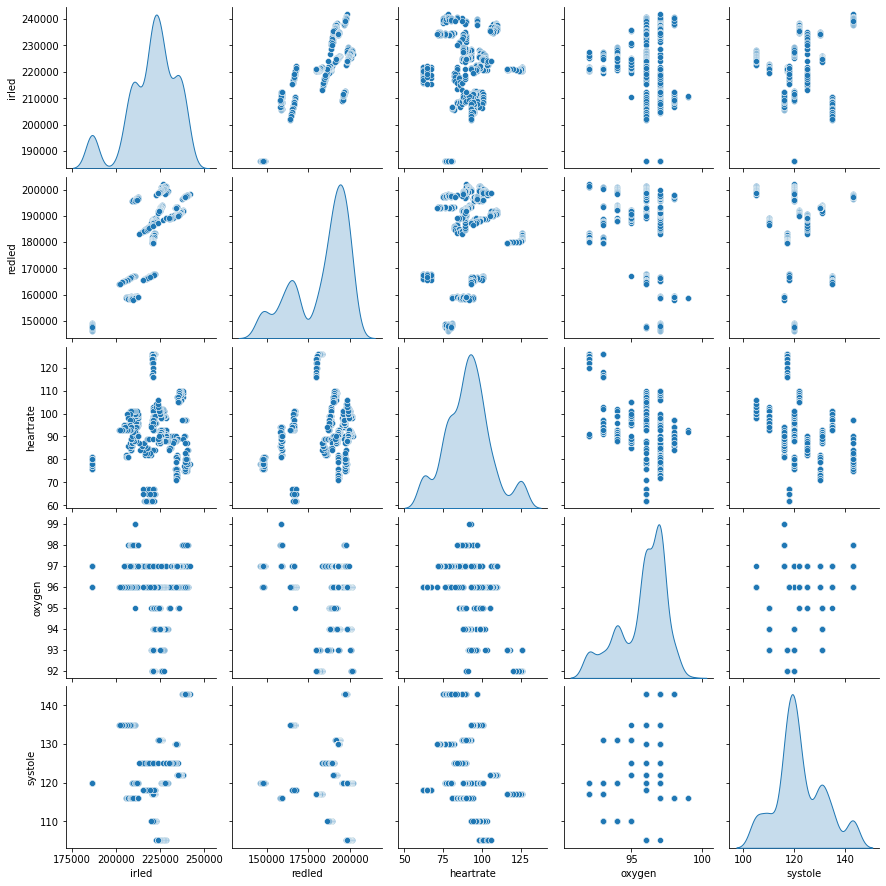

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

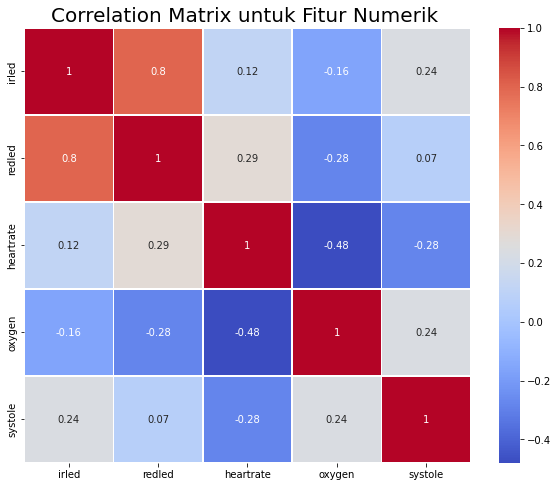

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
X = df.drop(["systole"],axis =1)
y = df["systole"]

In [ ]:
numerical_features = ['irled', 'redled', 'heartrate', 'oxygen']
scaler = MinMaxScaler()
scaler.fit(X[numerical_features])
X[numerical_features] = scaler.transform(X.loc[:, numerical_features])
X[numerical_features].head()

,irled,redled,heartrate,oxygen
0,0.619977,0.762013,0.640625,0.142857
1,0.620824,0.763176,0.625000,0.142857
2,0.620878,0.761154,0.625000,0.285714
3,0.621328,0.761548,0.609375,0.285714
4,0.619797,0.765037,0.609375,0.428571


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(553, 4) (553,) (139, 4) (139,)


In [ ]:
x_val = X_train[-139:]
y_val = y_train[-139:]

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(4,1)))
model.add(Conv1D(64, 2, activation="relu"))
model.add(Conv1D(128, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [ ]:
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=tf.optimizers.Adam(learning_rate=1.000e-4),
              metrics=['mae'])

In [ ]:
minMAE = 0.4
minMAE

0.4

In [ ]:
minMAE = (df['systole'].max() - df['systole'].min())
minMAE

In [ ]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('mae') < minMAE):
            print("\nmae < 10%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [ ]:
%%time
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10000,
    validation_data=(x_val, y_val),
    callbacks = [callbacks]
)


Epoch 1/10000
35/35 [==============================] - 1s 13ms/step - loss: 22.0742 - mae: 122.0295 - val_loss: 20.3098 - val_mae: 121.3029
Epoch 2/10000
35/35 [==============================] - 0s 6ms/step - loss: 17.3375 - mae: 121.1563 - val_loss: 13.3510 - val_mae: 119.4487
Epoch 3/10000
35/35 [==============================] - 0s 6ms/step - loss: 9.7789 - mae: 117.2798 - val_loss: 6.3500 - val_mae: 112.5557
Epoch 4/10000
35/35 [==============================] - 0s 7ms/step - loss: 4.3784 - mae: 106.7026 - val_loss: 2.6575 - val_mae: 97.8417
Epoch 5/10000
35/35 [==============================] - 0s 6ms/step - loss: 1.7981 - mae: 88.8391 - val_loss: 1.0542 - val_mae: 76.7745
Epoch 6/10000
35/35 [==============================] - 0s 6ms/step - loss: 0.7008 - mae: 66.1598 - val_loss: 0.3939 - val_mae: 52.9359
Epoch 7/10000
35/35 [==============================] - 0s 6ms/step - loss: 0.2610 - mae: 43.0842 - val_loss: 0.1505 - val_mae: 31.6530
Epoch 8/10000
35/35 [======================

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [diastole]')
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_mae(history):
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.ylim([0, 30])
  plt.xlabel('Epoch')
  plt.ylabel('Error [diastole]')
  plt.legend()
  plt.grid(True)

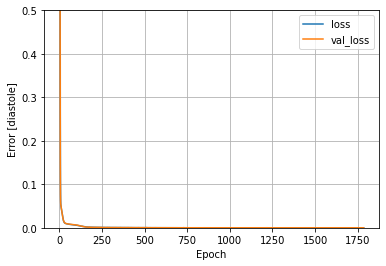

In [ ]:
plot_loss(history)

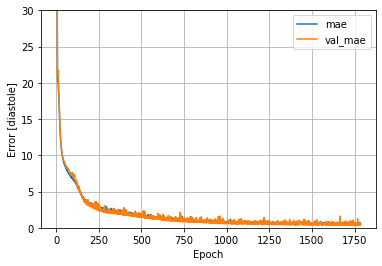

In [ ]:
plot_mae(history)

4/4 [==============================] - 0s 5ms/step


ValueError: ignored

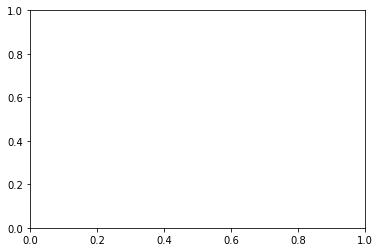

In [ ]:
test_predictions = model.predict(X_test[0:101]).flatten()

a = plt.axes(aspect="auto")
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Diastole]')
plt.ylabel('Predictions [Diastole]')
lims = [0, 70000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
prediksi = model.predict(X_test[0:101])
print(prediksi)
ypred = np.array(prediksi)

4/4 [==============================] - 0s 3ms/step
[[119.821754]
 [131.9179  ]
 [115.95274 ]
 [144.31375 ]
 [142.8719  ]
 [120.604225]
 [120.40295 ]
 [120.16547 ]
 [144.92038 ]
 [115.97719 ]
 [142.49425 ]
 [120.10739 ]
 [105.59863 ]
 [123.635185]
 [120.10527 ]
 [131.39673 ]
 [131.54106 ]
 [120.95471 ]
 [130.99036 ]
 [117.966515]
 [118.05864 ]
 [144.70033 ]
 [115.77487 ]
 [131.46832 ]
 [122.2626  ]
 [142.99672 ]
 [116.798256]
 [124.92055 ]
 [122.70202 ]
 [131.53705 ]
 [117.11397 ]
 [118.381805]
 [117.07865 ]
 [117.14364 ]
 [119.880516]
 [119.94478 ]
 [120.602005]
 [131.49968 ]
 [120.19492 ]
 [117.250725]
 [117.204956]
 [124.89534 ]
 [120.48562 ]
 [135.24568 ]
 [123.33636 ]
 [135.13155 ]
 [129.93076 ]
 [118.301926]
 [124.65317 ]
 [105.63878 ]
 [116.762924]
 [125.33655 ]
 [106.16516 ]
 [110.29266 ]
 [126.13548 ]
 [131.13664 ]
 [135.26024 ]
 [134.93193 ]
 [122.44136 ]
 [106.37543 ]
 [110.55823 ]
 [121.02751 ]
 [135.56993 ]
 [124.262405]
 [120.80382 ]
 [135.55772 ]
 [120.56091 ]
 [124.05228

In [ ]:
y_test

381    120
664    130
257    116
338    143
319    143
      ... 
658    130
24     110
158    120
602    122
344    143
Name: systole, Length: 139, dtype: int64

In [ ]:
predictions

array([[110.04686 ],
       [109.75293 ],
       [110.98947 ],
       [110.81987 ],
       [110.29971 ],
       [110.3062  ],
       [109.29762 ],
       [109.05884 ],
       [110.19434 ],
       [109.702805],
       [110.29266 ],
       [110.518425],
       [111.60918 ],
       [112.37712 ],
       [111.22162 ],
       [110.16655 ],
       [110.159164],
       [109.91281 ],
       [109.48234 ],
       [110.70648 ],
       [110.26125 ],
       [110.52247 ],
       [110.38245 ],
       [108.8754  ],
       [108.93666 ],
       [108.99007 ],
       [110.66826 ],
       [110.30177 ],
       [110.36939 ],
       [110.43979 ],
       [110.56811 ],
       [110.55821 ],
       [110.71446 ],
       [110.78923 ],
       [110.67938 ],
       [110.65816 ],
       [110.45082 ],
       [109.70108 ],
       [109.98822 ],
       [110.04348 ],
       [110.02309 ],
       [110.239136],
       [110.536194],
       [110.74922 ],
       [110.48479 ],
       [110.532555],
       [110.5912  ],
       [110.4

In [ ]:
data =pd.DataFrame(predictions[0:700])
from google.colab import files
data.to_csv('result.csv', encoding = 'utf-8-sig') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_results = {}
test_results['model'] = model.evaluate(X, y, verbose=1)

22/22 [==============================] - 1s 2ms/step - loss: 22.7362 - mae: 122.2068


In [ ]:
!mkdir -p saved_model
model.save('saved_model/blood_model.h5')

In [ ]:
load_model('saved_model/blood_model.h5')

In [ ]:
y_pred = model.predict(X[0:10])
y_pred

1/1 [==============================] - 0s 32ms/step


array([[110.04686 ],
       [109.75293 ],
       [110.98947 ],
       [110.81987 ],
       [110.29971 ],
       [110.3062  ],
       [109.29762 ],
       [109.05884 ],
       [110.19434 ],
       [109.702835]], dtype=float32)

In [ ]:
reloaded = tf.keras.models.load_model('saved_model/blood_model.h5')

test_results['reloaded'] = reloaded.evaluate(
    X, y, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 2.7407e-05 - mae: 0.4757


In [ ]:
X

,irled,redled,heartrate,oxygen
0,0.619977,0.762013,0.640625,0.142857
1,0.620824,0.763176,0.625000,0.142857
2,0.620878,0.761154,0.625000,0.285714
3,0.621328,0.761548,0.609375,0.285714
4,0.619797,0.765037,0.609375,0.428571
...,...,...,...,...
687,0.864526,0.839845,0.171875,0.714286
688,0.856116,0.835406,0.156250,0.714286
689,0.870631,0.840489,0.156250,0.714286
690,0.865084,0.837679,0.140625,0.571429


In [ ]:
pd.DataFrame(test_results, index=['Loss', 'Mean Absolute Error']).T

,Loss,Mean Absolute Error
model,0.000027,0.475723
reloaded,0.000027,0.475723


In [ ]:
import pickle

In [ ]:
filename = 'systole_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('systole_model.sav', 'rb'))

In [ ]:
scaler = MinMaxScaler()
train = scaler.fit_transform(X[numerical_features])
predict = scaler.transform(X[numerical_features])
predictions = model.predict(predict)
print("X=%s, Predicted=%s" % (predict[0:700], predictions[0:700]))

22/22 [==============================] - 0s 2ms/step
X=[[0.61997717 0.76201299 0.640625   0.14285714]
 [0.62082355 0.76317626 0.625      0.14285714]
 [0.62087757 0.76115396 0.625      0.28571429]
 ...
 [0.87063053 0.84048893 0.15625    0.71428571]
 [0.86508406 0.83767919 0.140625   0.57142857]
 [0.86494    0.83755391 0.140625   0.57142857]], Predicted=[[110.89638 ]
 [110.83348 ]
 [110.2023  ]
 [110.458145]
 [110.61917 ]
 [110.61749 ]
 [110.21925 ]
 [110.18908 ]
 [110.14732 ]
 [110.12193 ]
 [110.118546]
 [110.553635]
 [110.71638 ]
 [110.77635 ]
 [110.32553 ]
 [110.05495 ]
 [110.05171 ]
 [111.49981 ]
 [110.35106 ]
 [110.04207 ]
 [110.02173 ]
 [110.11316 ]
 [110.10298 ]
 [110.05806 ]
 [110.05537 ]
 [110.05359 ]
 [110.26941 ]
 [110.12172 ]
 [110.13631 ]
 [110.15298 ]
 [110.199   ]
 [110.15869 ]
 [110.21057 ]
 [110.255684]
 [110.20527 ]
 [110.19726 ]
 [109.84242 ]
 [109.5276  ]
 [109.47061 ]
 [109.47235 ]
 [109.449776]
 [109.749504]
 [111.1142  ]
 [111.43159 ]
 [111.22867 ]
 [111.265045]
 [

In [ ]:
from numpy import asarray
input_data = (0.619977,	0.762013,	0.640625,	0.142857)
data_array = np.asarray(input_data)
data_reshape = data_array.reshape(1,1)
predicted = loaded_model.predict(data_reshape)
print(predicted)

ValueError: ignored

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test[1:101], y_pred=ypred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
report = classification_report(ypred, y_test[1:101])
print(report)

NameError: ignored

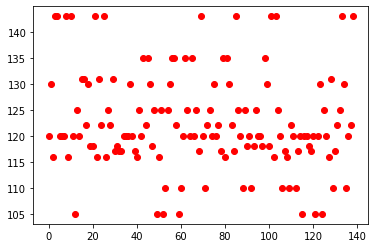

In [ ]:
y_test_array = np.array(y_test[0:700])
plt.plot(y_test_array, 'ro')
plt.show()

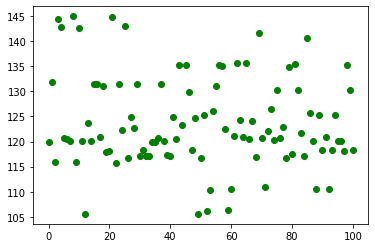

In [ ]:
plt.plot(ypred, 'go')
plt.show()

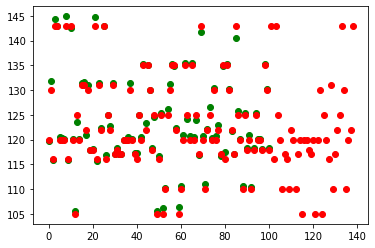

In [ ]:
plt.plot(ypred, 'go')
plt.plot(y_test_array, 'ro')
plt.show()

# New Section

In [ ]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
irled,482.0,223160.493776,10546.432652,201816.0,212580.75,224028.0,233945.75,241813.0
redled,482.0,185979.529046,13739.053070,158098.0,167731.75,191710.5,196862.25,201409.0
heartrate,482.0,89.684647,12.474178,62.0,82.00,92.0,98.00,118.0
oxygen,482.0,95.964730,1.362095,92.0,95.00,96.0,97.00,99.0
diastole,482.0,76.209544,10.979080,60.0,70.00,72.0,90.00,94.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('diastole')
test_labels = test_features.pop('diastole')

In [ ]:
from sklearn import preprocessing
biosignal = pd.read_csv("PPG.csv")
d = preprocessing.normalize(biosignal)
scaled = pd.DataFrame(d, columns=names)
scaled.head()

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define data
data = (np.array(train_features))
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[225187 199366    101     96]
 [228384 199061     89     94]
 [212554 197119     95     97]
 ...
 [228622 199432     90     94]
 [239831 197528     97     98]
 [211366 196106    101     96]]
[[0.50565611 0.88851904 0.76923077 0.66666667]
 [0.60611488 0.87187602 0.46153846 0.33333333]
 [0.10869155 0.76590636 0.61538462 0.83333333]
 ...
 [0.61359351 0.89212048 0.48717949 0.33333333]
 [0.96581197 0.78822438 0.66666667 1.        ]
 [0.07136124 0.71062971 0.76923077 0.66666667]]


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[2.2316048e+05 1.8597956e+05 8.9684647e+01 9.5964729e+01]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[227809 200268     92     94]]

Normalized: [[ 0.44  1.04  0.19 -1.44]]


In [ ]:
def build_and_compile_model(norm):
  model = tf.keras.models.Sequential([
    norm,
      tf.keras.layers.Dense(4, activation='relu'),
      #tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1)
])

  model.compile(loss='mean_squared_logarithmic_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1.000e-4, momentum=0.9),
                metrics=['mae'])
  return model

In [ ]:
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 1024)              5120      
                                                                 
 dense_68 (Dense)            (None, 512)               524800    
                                                                 
 dense_69 (Dense)            (None, 128)               65664     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
%%time
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    batch_size = 8,
    epochs=2000,
    verbose=1,
    callbacks = [callbacks])

Epoch 1/2000
36/36 [==============================] - 1s 8ms/step - loss: 17.3801 - mae: 75.1759 - val_loss: 15.1220 - val_mae: 74.8114
Epoch 2/2000
36/36 [==============================] - 0s 6ms/step - loss: 13.5728 - mae: 74.4181 - val_loss: 12.1394 - val_mae: 74.0247
Epoch 3/2000
36/36 [==============================] - 0s 5ms/step - loss: 11.0184 - mae: 73.5442 - val_loss: 10.0475 - val_mae: 73.1453
Epoch 4/2000
36/36 [==============================] - 0s 5ms/step - loss: 9.3171 - mae: 72.6656 - val_loss: 8.3978 - val_mae: 72.1200
Epoch 5/2000
36/36 [==============================] - 0s 6ms/step - loss: 7.6908 - mae: 71.4382 - val_loss: 7.0499 - val_mae: 70.9320
Epoch 6/2000
36/36 [==============================] - 0s 5ms/step - loss: 6.6003 - mae: 70.2945 - val_loss: 5.9367 - val_mae: 69.5798
Epoch 7/2000
36/36 [==============================] - 0s 5ms/step - loss: 5.5504 - mae: 68.8438 - val_loss: 5.0155 - val_mae: 68.0761
Epoch 8/2000
36/36 [==============================] - 0s

KeyboardInterrupt: ignored

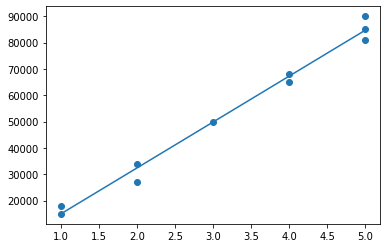

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dan harga rumah
plt.scatter(heartrate, systole)
plt.plot(bedrooms, linreg.predict(bedrooms))

# New Section

In [ ]:
import pandas as pd
df = pd.read_csv('PPG.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   irled      700 non-null    int64
 1   redled     700 non-null    int64
 2   heartrate  700 non-null    int64
 3   oxygen     700 non-null    int64
 4   diastole   700 non-null    int64
dtypes: int64(5)
memory usage: 27.5 KB


In [ ]:
df.head()

,irled,redled,heartrate,oxygen,diastole
0,220710,188788,103,93,63
1,220757,188853,102,93,63
2,220760,188740,102,94,63
3,220785,188762,101,94,63
4,220700,188957,101,95,63


In [ ]:
dataset = df.values

In [ ]:
X = dataset[:,0:4]
print(X)

[[220710 188788    103     93]
 [220757 188853    102     93]
 [220760 188740    102     94]
 ...
 [234629 193173     72     97]
 [234321 193016     71     96]
 [234313 193009     71     96]]


In [ ]:
y = dataset[:,4]
y = y.reshape(-1,1)
#print(y)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
y_scale = min_max_scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(4,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00